# Filters, Standard Stars, etc.

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(font_scale=1.5, context='paper', style='white')
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Gentium"
plt.rcParams['mathtext.fontset'] = "cm"

In [2]:
# sed templates
wave_ab, flux_ab = np.loadtxt('sed_templates/ab-spec.dat').T
wave_vega, flux_vega = np.loadtxt('sed_templates/alpha_lyr_stis_005.dat').T
wave_bd17, flux_bd17 = np.loadtxt('sed_templates/bd_17d4708_stisnic_006.dat').T

# filters
bessell_files = [filt_file for filt_file in glob.glob('filters/Bessell/*') if '.dat' in filt_file]
bessell_filters = [filt_file.split('/')[-1][:-4] for filt_file in glob.glob('filters/Bessell/*') if '.dat' in filt_file]

sdss_files = [filt_file for filt_file in glob.glob('filters/SDSS/*') if '.dat' in filt_file]
sdss_filters = [filt_file.split('/')[-1][:-4] for filt_file in glob.glob('filters/SDSS/*') if '.dat' in filt_file]

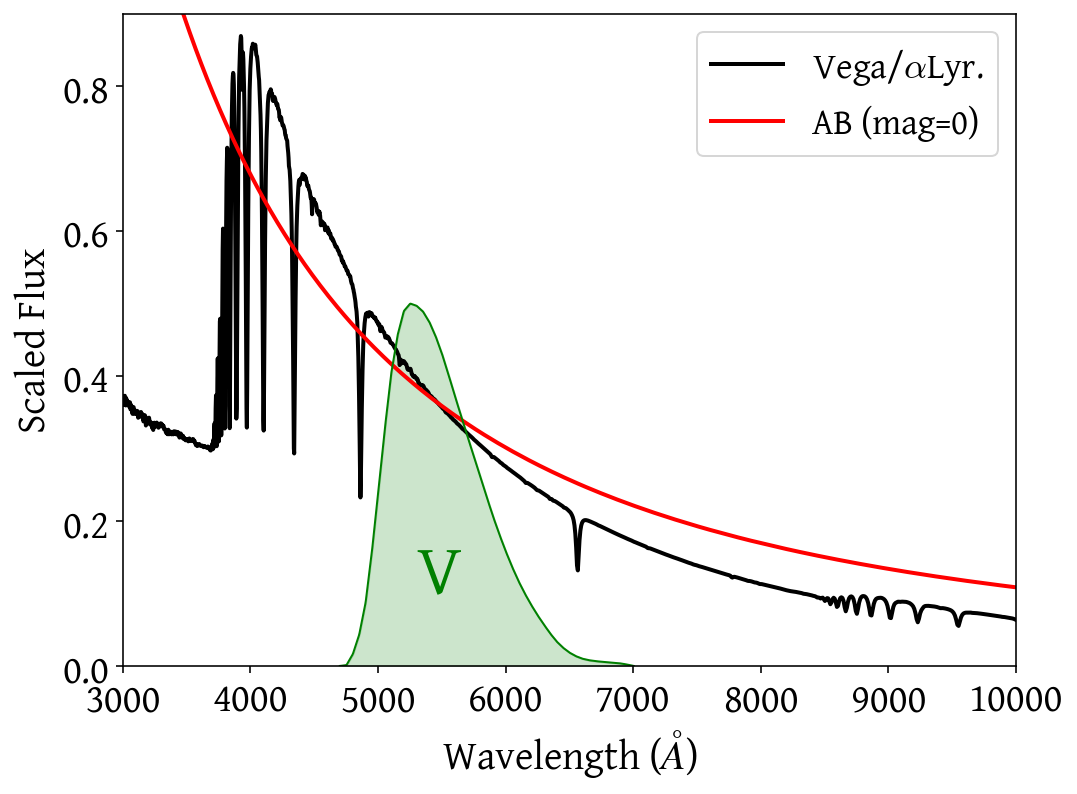

In [3]:
fontsize = 20
wave_v, trans_v = np.loadtxt(bessell_files[1]).T

f, ax = plt.subplots(figsize=(8,6))

norm = 1e-8
ax.plot(wave_vega, flux_vega/norm, label=r'Vega/$\alpha$Lyr.', lw=2, color='k')
ax.plot(wave_ab, flux_ab/norm, label=r'AB (mag=0)', lw=2, color='r')

ax.plot(wave_v, trans_v/2, lw=1, color='g') # , label=r'Bessell V'
ax.fill_between(wave_v, trans_v/2, 0, color='g', alpha=0.2)
ax.text(5300, 0.1, 'V', color='g', fontsize=35)

ax.set_xlabel(r'Wavelength ($\AA$)', fontsize=fontsize)
ax.set_ylabel('Scaled Flux', fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(3000, 10000)
ax.set_ylim(0, 0.9)
plt.legend(fontsize=18)
plt.savefig('plots/vega_ab_seds.pdf', bbox_inches='tight')
plt.show()

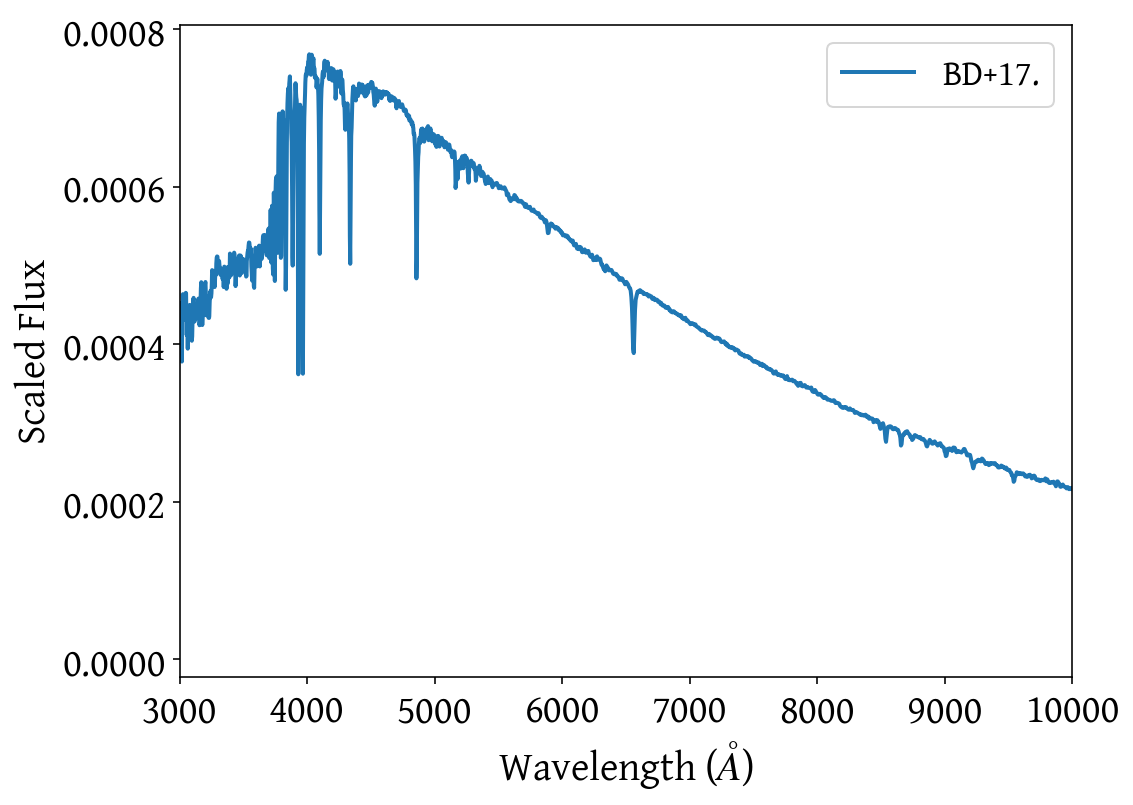

In [4]:
fontsize = 20

f, ax = plt.subplots(figsize=(8,6))

norm = 1e-9
ax.plot(wave_bd17, flux_bd17/norm, label=r'BD+17.', lw=2)

ax.set_xlabel(r'Wavelength ($\AA$)', fontsize=fontsize)
ax.set_ylabel('Scaled Flux', fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(3000, 10000)
#ax.set_ylim(0, 10)
plt.legend(fontsize=18)
#plt.savefig('plots/bd17.pdf', bbox_inches='tight')
plt.show()

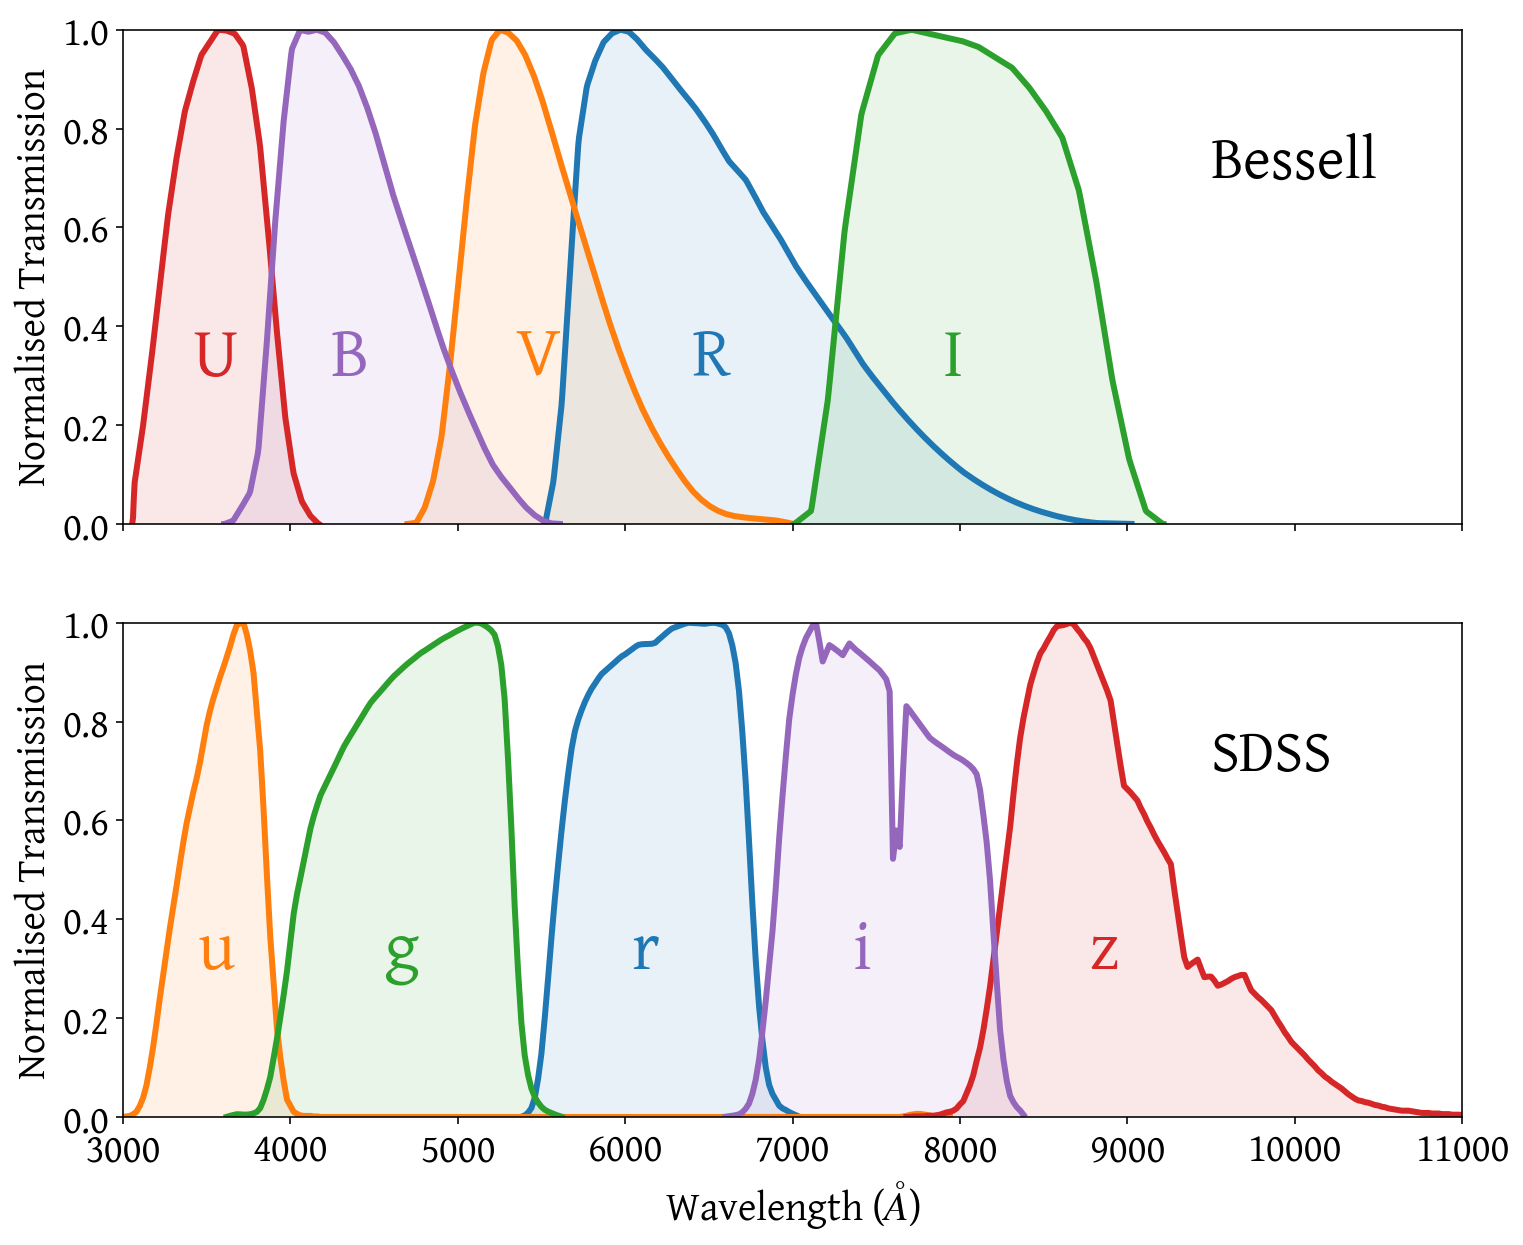

In [5]:
fontsize = 20

f, ax = plt.subplots(2, 1, figsize=(12,10), sharex=True)

for filt_file, filt_name in zip(bessell_files, bessell_filters):
    wave, trans = np.loadtxt(filt_file).T
    bs = ax[0].plot(wave, trans, label=filt_name, lw=3)
    ax[0].fill_between(wave, trans, 0.0, alpha=0.1)
    ax[0].text(np.average(wave, weights=trans)-150, 0.3, filt_name[-1], fontsize=35, color=bs[0].get_color())
    
ax[0].text(9500, 0.7, 'Bessell', fontsize=30)

for filt_file, filt_name in zip(sdss_files, sdss_filters):
    wave, trans = np.loadtxt(filt_file).T
    trans /= trans.max()
    bs = ax[1].plot(wave, trans, label=filt_name, lw=3)
    ax[1].fill_between(wave, trans, 0.0, alpha=0.1)
    ax[1].text(np.average(wave, weights=trans)-150, 0.3, filt_name[-1], fontsize=35, color=bs[0].get_color())
    
ax[1].text(9500, 0.7, 'SDSS', fontsize=30)

ax[0].set_ylabel('Normalised Transmission', fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[0].set_ylim(0, 1)

ax[1].set_xlabel(r'Wavelength ($\AA$)', fontsize=fontsize)
ax[1].set_ylabel('Normalised Transmission', fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)
ax[1].set_ylim(0, 1)
ax[1].set_xlim(3000, 11000)

#plt.legend(fontsize=18)
plt.savefig('plots/filters.pdf', bbox_inches='tight')
plt.show()